# Проект. 11 вариант

## Описание датасета Wine:

Датасет Wine представляет собой набор данных о химических характеристиках трех различных видов вин (красное, белое и розовое). Каждое вино производится в одном из трех различных винодельческих регионов в Италии. Датасет включает 13 признаков, описывающих различные химические свойства вин, а также метку класса, указывающую на вид вина.

## Описание признаков:

1. `alcohol`: Содержание алкоголя в вине.
2. `malic_acid`: Количество яблочной кислоты в вине.
3. `ash`: Зольность в вине.
4. `alcalinity_of_ash`: Щелочность золы в вине.
5. `magnesium`: Количество магния в вине.
6. `total_phenols`: Общее количество фенолов в вине.
7. `flavanoids`: Количество флавоноидов в вине.
8. `nonflavanoid_phenols`: Количество нефлавоноидных фенолов в вине.
9. `proanthocyanins`: Количество проантоцианов в вине.
10. `color_intensity`: Интенсивность цвета вина.
11. `hue`: Оттенок вина.
12. `od280/od315_of_diluted_wines`: Оптическая плотность водных растворов разбавленного вина.
13. `proline`: Количество антиоксиданта в вине (пролин).

In [1]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()

# Создаем DataFrame для удобного отображения данных
df = pd.DataFrame(data.data, columns=data.feature_names)

# Добавляем столбец с метками классов
df['target'] = data.target

# Выводим первые несколько строк данных
print(df.head(10))


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

## Что можно предсказывать по этим данным:

Используя эти химические характеристики, можно предсказывать класс вина (вид: красное, белое или розовое) на основе их химических свойств.

## Метод опорных векторов (SVM):

**Что это такое:**
Метод опорных векторов (SVM) - это алгоритм машинного обучения, который используется для задач классификации и регрессии. Он работает путем поиска оптимальной разделяющей гиперплоскости, которая максимизирует расстояние между двумя классами.

**Применение на датасете Wine:**

SVM пытается построить оптимальную гиперплоскость, которая максимально разделяет различные классы в пространстве признаков, что делает его мощным инструментом для классификации вина на основе их химических характеристик.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Шаг 1: Разделение данных
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 2: Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 3: Обучение модели SVM
svm_model = SVC(kernel='linear')  # Вы можете использовать различные ядра (например, 'linear', 'rbf')
svm_model.fit(X_train_scaled, y_train)

# Шаг 4: Оценка модели
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.9722222222222222


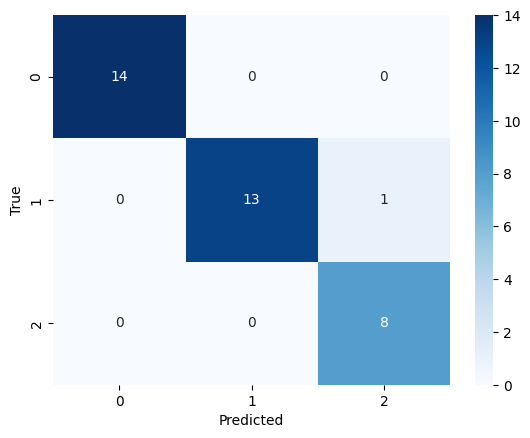

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


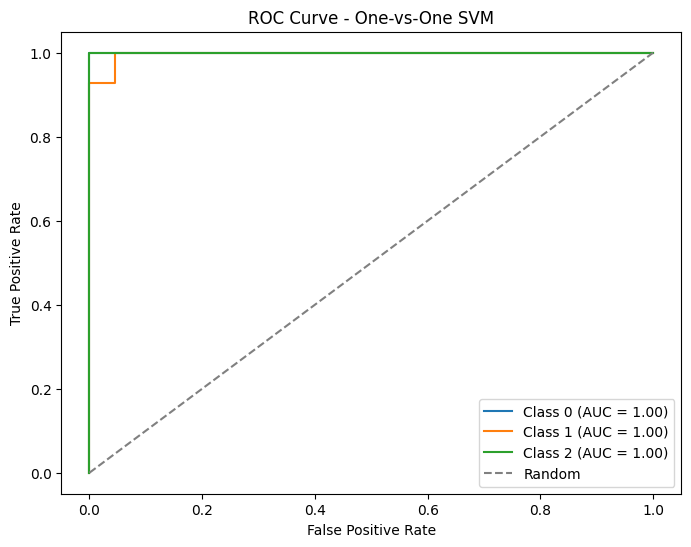

In [5]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Шаг 1: Создание OvO-классификатора
svm_ovo = OneVsOneClassifier(SVC(kernel='linear', probability=True))

# Шаг 2: Обучение модели
svm_ovo.fit(X_train_scaled, y_train)

# Шаг 3: Получение вероятностей для каждого класса
y_prob = svm_ovo.decision_function(X_test_scaled)

# Шаг 4: Построение ROC-кривых для каждой пары классов
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(data.target_names.shape[0]):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Шаг 5: Построение ROC-кривых
plt.figure(figsize=(8, 6))
for i in range(data.target_names.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-One SVM')
plt.legend()
plt.show()


In [6]:
from sklearn.datasets import load_wine
import numpy as np

# Загрузка данных
data = load_wine()

# Создаем список индексов для столбцов
column_indices = [f'feature_{i}' for i in range(data.data.shape[1])]

# Выводим все индексы столбцов
print("Индексы столбцов:", column_indices)


Индексы столбцов: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12']


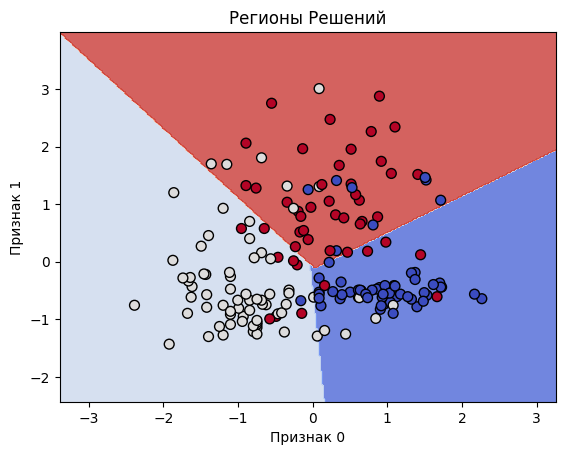

In [7]:
# Выберите два признака для визуализации
feature_index1 = 0
feature_index2 = 1

# Обучение модели на выбранных признаках
svm_model.fit(X_train_scaled[:, [feature_index1, feature_index2]], y_train)

# Создание комбинированных данных для визуализации
X_combined = np.vstack((X_train_scaled[:, [feature_index1, feature_index2]], X_test_scaled[:, [feature_index1, feature_index2]]))
y_combined = np.hstack((y_train, y_test))

# Создание сетки для построения графика
h = .02
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание классов для каждой точки в сетке
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)
plt.xlabel(f'Признак {feature_index1}')
plt.ylabel(f'Признак {feature_index2}')
plt.title('Регионы Решений')
plt.show()



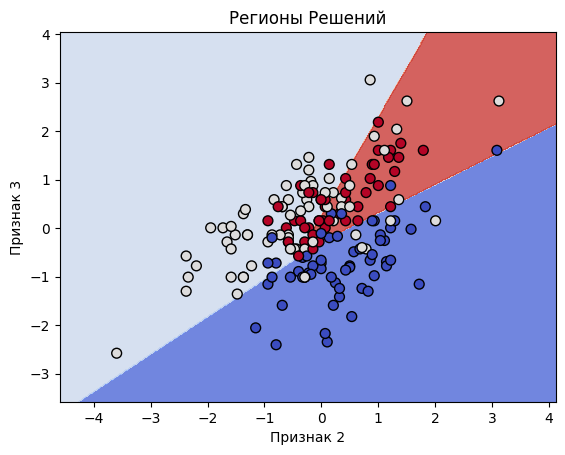

In [8]:
# Выберите два признака для визуализации
feature_index1 = 2
feature_index2 = 3

# Обучение модели на выбранных признаках
svm_model.fit(X_train_scaled[:, [feature_index1, feature_index2]], y_train)

# Создание комбинированных данных для визуализации
X_combined = np.vstack((X_train_scaled[:, [feature_index1, feature_index2]], X_test_scaled[:, [feature_index1, feature_index2]]))
y_combined = np.hstack((y_train, y_test))

# Создание сетки для построения графика
h = .02
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание классов для каждой точки в сетке
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)
plt.xlabel(f'Признак {feature_index1}')
plt.ylabel(f'Признак {feature_index2}')
plt.title('Регионы Решений')
plt.show()


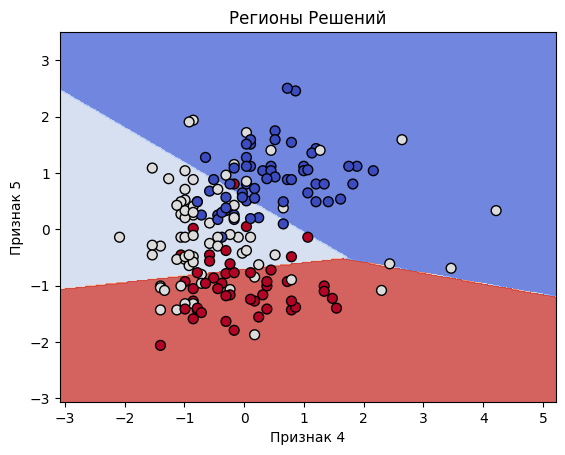

In [9]:
# Выберите два признака для визуализации
feature_index1 = 4
feature_index2 = 5

# Обучение модели на выбранных признаках
svm_model.fit(X_train_scaled[:, [feature_index1, feature_index2]], y_train)

# Создание комбинированных данных для визуализации
X_combined = np.vstack((X_train_scaled[:, [feature_index1, feature_index2]], X_test_scaled[:, [feature_index1, feature_index2]]))
y_combined = np.hstack((y_train, y_test))

# Создание сетки для построения графика
h = .02
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание классов для каждой точки в сетке
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)
plt.xlabel(f'Признак {feature_index1}')
plt.ylabel(f'Признак {feature_index2}')
plt.title('Регионы Решений')
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import numpy as np

# Загрузка данных (замените на свой датасет)
data = load_wine()

# Используем признаки и метки
X = data.data
y = data.target

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

# Получаем веса (важности) признаков
feature_weights = np.abs(svm_model.coef_)[0]

# Находим индексы двух наиболее важных признаков
top_two_features = np.argsort(feature_weights)[-2:]

# Выводим имена этих признаков
feature_names = data.feature_names
top_feature_names = [feature_names[i] for i in top_two_features]
print("Наиболее важные признаки:", top_feature_names)



Наиболее важные признаки: ['alcalinity_of_ash', 'proline']


In [11]:

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_index1 = 3
feature_index2 = 12

# Выбираем два признака для обучения модели
X = np.vstack((X_train_scaled[:, [feature_index1, feature_index2]], X_test_scaled[:, [feature_index1, feature_index2]]))
y = np.hstack((y_train, y_test))

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
new_feature1 = float(input("Введите значение для Alcalinity_of_ash: "))
new_feature2 = float(input("Введите значение для Proline: "))

# Создаем массив для нового наблюдения
new_data_point = np.array([[new_feature1, new_feature2]])
#new_data_point = np.array([[25, 1030]])

# Стандартизируем новые данные
new_data_point_standardized = scaler.transform(new_data_point)

# Предсказываем класс для новых данных
predicted_class = svm_model.predict(new_data_point_standardized)

# Выводим результат
print(f"Предположение о классе по двум признакам: {predicted_class}")

Введите значение для Alcalinity_of_ash: 12
Введите значение для Proline: 2
Предположение о классе по двум признакам: [2]


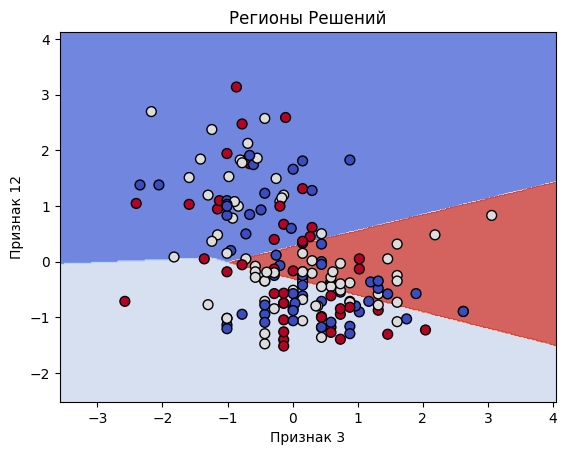

In [12]:
# Выберите два признака для визуализации
feature_index1 = 3
feature_index2 = 12


# Создание комбинированных данных для визуализации
X_combined = np.vstack((X_train_scaled[:, [feature_index1, feature_index2]], X_test_scaled[:, [feature_index1, feature_index2]]))
y_combined = np.hstack((y_train, y_test))

# Создание сетки для построения графика
h = .02
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание классов для каждой точки в сетке
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)
plt.xlabel(f'Признак {feature_index1}')
plt.ylabel(f'Признак {feature_index2}')
plt.title('Регионы Решений')
plt.show()

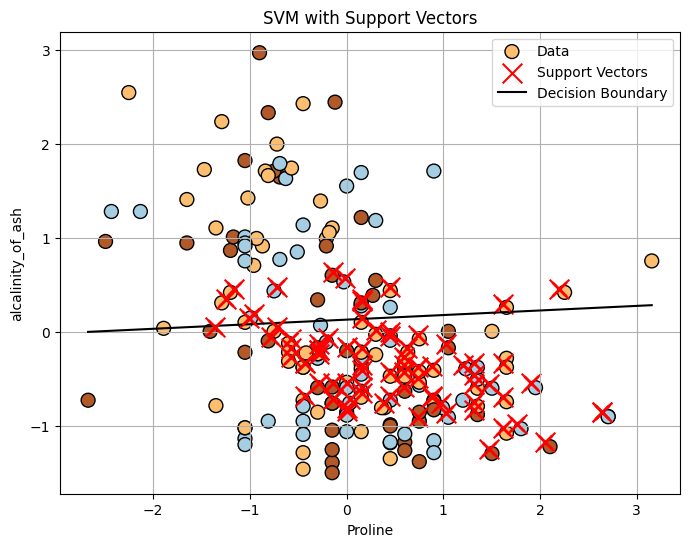

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


feature_index1 = 3
feature_index2 = 12


# Создание комбинированных данных для визуализации
X = np.vstack((X_train_scaled[:, [feature_index1, feature_index2]], X_test_scaled[:, [feature_index1, feature_index2]]))
y = np.hstack((y_train, y_test))

# Стандартизируем данные
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
support_vectors = svm_model.support_vectors_
coef = svm_model.coef_[0]
intercept = svm_model.intercept_[0]
# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_standardized, y)

# Построение графика
plt.figure(figsize=(8, 6))

# Рисуем точки данных
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100, label='Data')

# Рисуем опорные векторы
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', s=200, label='Support Vectors')

# Рисуем разделяющую гиперплоскость
xx = np.linspace(X_standardized[:, 0].min(), X_standardized[:, 0].max(), 100)
yy = -(coef[0]/coef[1]) * xx - intercept/coef[1]
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Подгоняем код для представления гиперплоскости
for i in range(len(support_vectors)):
    plt.plot([support_vectors[i, 0]], [support_vectors[i, 1]], 'x', color='red', markeredgewidth=2, markersize=10)

plt.title('SVM with Support Vectors')
plt.xlabel('Proline')
plt.ylabel('alcalinity_of_ash')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


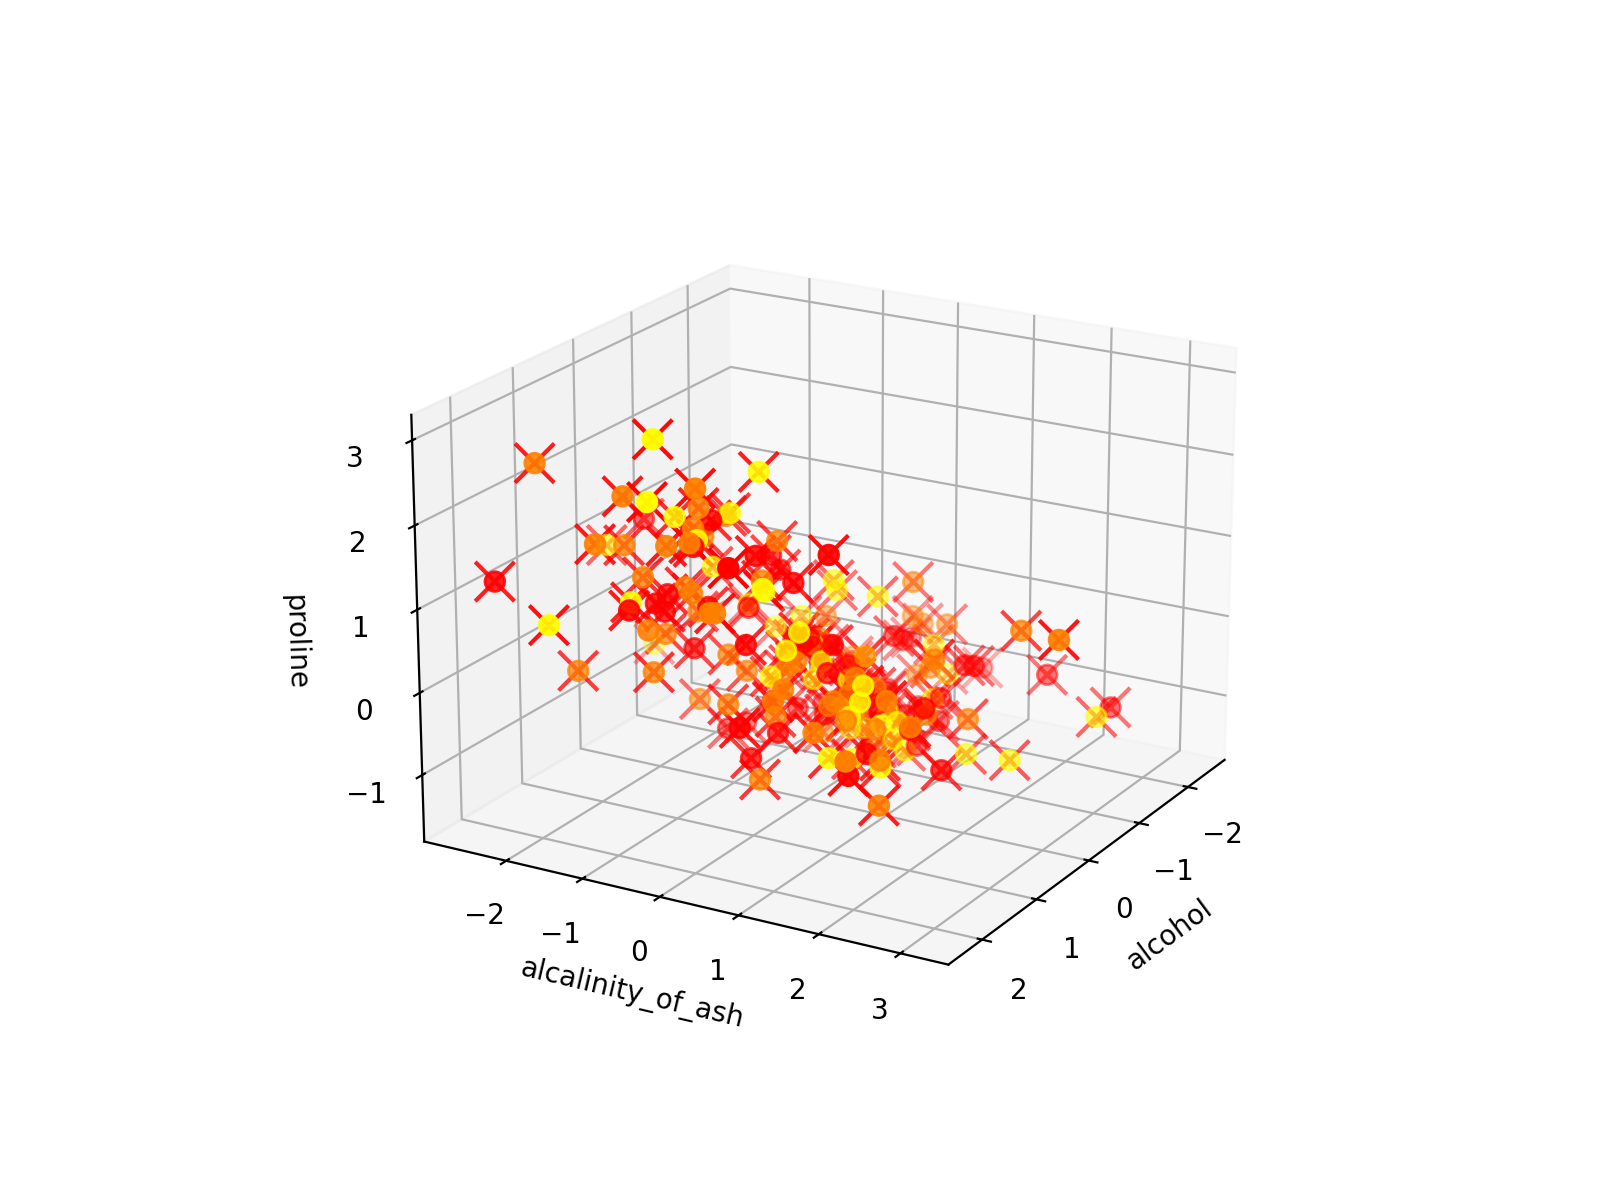

interactive(children=(IntSlider(value=20, description='elev', max=90), IntSlider(value=30, description='azim',…

In [14]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed


feature_index1 = 0
feature_index2 = 3
feature_index3 = 12

# Создание комбинированных данных для визуализации
X = np.vstack((X_train_scaled[:, [feature_index1, feature_index2, feature_index3]], X_test_scaled[:, [feature_index1, feature_index2, feature_index3]]))
y = np.hstack((y_train, y_test))

# Стандартизируем данные
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_standardized, y)

# Получаем опорные векторы
support_vectors = svm_model.support_vectors_

# Вычисляем r
r = np.exp(-(X_standardized[:, :2] ** 2).sum(1))

def plot_3D(elev=20, azim=30, X=X_standardized, y=y, r=r):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('alcohol')
    ax.set_ylabel('alcalinity_of_ash')
    ax.set_zlabel('proline')
    
    # Добавляем опорные векторы
    ax.scatter3D(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], color='red', marker='x', s=200, label='Support Vectors')

# Используем interact для взаимодействия с графиком
interact(plot_3D, elev=(0, 90), azim=(-180, 180), X=fixed(X_standardized), y=fixed(y), r=fixed(r))
plt.show()